In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import sklearn.linear_model
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import wrangle_module

In [2]:
permits = wrangle_module.acquire_permits()
permits = wrangle_module.prep_permits(permits)
# permits = wrangle_module.encode_permits(permits)
permits.shape

(67355, 34)

In [3]:
permits.head()

,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,...,District_03,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A
Permit_approved,,,,,,,,,,,,,,,,,,,,,
2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,Submitted 12/31/2015 Approved 01/04/2016,812958,46140267,"PARSLEY ENERGY OPERATIONS, LLC (642652)",RATLIFF 28,1D,7C,UPTON,Vertical,New Drill,...,0,0,0,0,0,0,0,0,1,0
2016-01-04,Submitted 12/31/2015 Approved 01/04/2016,812959,30132834,RKI EXPLORATION & PRODUCTION LLC (714221),CBR 4,6H,08,LOVING,Horizontal,New Drill,...,0,0,0,0,1,0,0,0,0,0
2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812974,44331348,HENRY RESOURCES LLC (378535),LAUREN,6201,7C,TERRELL,Vertical,Recompletion,...,0,0,0,0,0,0,0,0,1,0
2016-01-04,Submitted 12/30/2015 Approved 01/04/2016,812953,28335696,CABOT OIL & GAS CORPORATION (121700),"SCHORP-WHITE RANCH, LTD. 12H",12H,01,LA SALLE,Horizontal,New Drill,...,0,0,0,0,0,0,0,0,0,0


In [4]:
type(permits.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
# permits.Permit_approved = pd.to_datetime(permits.Permit_approved)
# permits.Permit_submitted = pd.to_datetime(permits.Permit_submitted)
# permits = permits.set_index(permits.Permit_approved).sort_index()

In [6]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67355 entries, 2016-01-04 to 2021-12-30
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Status_Date           67355 non-null  object        
 1   Status                67355 non-null  int64         
 2   API_NO.               67355 non-null  int64         
 3   Operator_Name_Number  67355 non-null  object        
 4   Lease_Name            67355 non-null  object        
 5   Well                  67355 non-null  object        
 6   District              67355 non-null  object        
 7   County                67355 non-null  object        
 8   Wellbore_Profile      67355 non-null  object        
 9   Filing_Purpose        67355 non-null  object        
 10  Amend                 67355 non-null  object        
 11  Total_Depth           67355 non-null  int64         
 12  Current_Queue         67355 non-null  object        
 13 

- Approval_time is an object, should be datetime or integer/float

In [7]:
# permits.Approval_time = pd.to_datetime(permits.Approval_time)
# this code won't work bc it's in string format--i resolved by addressing it in the wrangle module

In [8]:
permits.head(1)

,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,...,District_03,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A
Permit_approved,,,,,,,,,,,,,,,,,,,,,
2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,...,0,0,0,0,0,0,0,0,0,0


In [9]:
permits.describe()

,Status,API_NO.,Total_Depth,Approval_time_days,SHALE_BARNETT,SHALE_EAGLE FORD,SHALE_HAYNESVILLE,SHALE_NONE,SHALE_PERMIAN BASIN,District_01,...,District_03,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A
count,67355.000000,6.735500e+04,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,...,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000,67355.000000
mean,842343.481464,2.928214e+07,9899.913384,6.572088,0.033004,0.213436,0.027704,0.108574,0.617282,0.103081,...,0.040398,0.033999,0.008002,0.034726,0.477366,0.034771,0.019212,0.031549,0.069334,0.058986
std,21891.444481,1.303898e+07,3814.741387,5.653174,0.178649,0.409736,0.164124,0.311106,0.486054,0.304066,...,0.196892,0.181228,0.089098,0.183087,0.499491,0.183201,0.137269,0.174798,0.254023,0.235600
min,70969.000000,1.008200e+05,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,827500.500000,2.113533e+07,7976.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842786.000000,3.173532e+07,10000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,858344.500000,3.893657e+07,12000.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,875615.000000,7.063026e+07,28010.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
permits.index.min(), permits.index.max(), permits.index.max()-permits.index.min()

(Timestamp('2016-01-04 00:00:00'),
 Timestamp('2021-12-30 00:00:00'),
 Timedelta('2187 days 00:00:00'))

- from the beginning of 2016 to the end of 2021

In [11]:
permits.Current_Queue.value_counts()

APPROVED    67355
Name: Current_Queue, dtype: int64

- all rows are in approved status

In [12]:
permits.isna().sum()

Status_Date             0
Status                  0
API_NO.                 0
Operator_Name_Number    0
Lease_Name              0
Well                    0
District                0
County                  0
Wellbore_Profile        0
Filing_Purpose          0
Amend                   0
Total_Depth             0
Current_Queue           0
Permit_submitted        0
Approval_time_days      0
SHALE                   0
Depth_bin               0
SHALE_BARNETT           0
SHALE_EAGLE FORD        0
SHALE_HAYNESVILLE       0
SHALE_NONE              0
SHALE_PERMIAN BASIN     0
District_01             0
District_02             0
District_03             0
District_04             0
District_05             0
District_06             0
District_08             0
District_09             0
District_10             0
District_7B             0
District_7C             0
District_8A             0
dtype: int64

- drop Stacked_Lateral_Parent_Well_DP, which is almost all na's
- drop the very few na's in wellbore and shale
#### Done in the wrangle file

In [13]:
permits.Lease_Name.nunique()

27177

- many duplicated lease names, but we are keeping these bc the same lease name can file multiple times for different wells/reasons

In [14]:
permits.County.value_counts()

REEVES           5627
MIDLAND          4883
MARTIN           4361
LOVING           3539
HOWARD           3364
                 ... 
BREWSTER            1
MILLS               1
COLLINGSWORTH       1
DEAF SMITH          1
FANNIN              1
Name: County, Length: 219, dtype: int64

In [15]:
len(permits.County.unique())

219

- there are 220 texas counties represented in this data

In [16]:
permits.head(1)

,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,...,District_03,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A
Permit_approved,,,,,,,,,,,,,,,,,,,,,
2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,...,0,0,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>,
        <AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>],
       [<AxesSubplot:title={'center':'SHALE_BARNETT'}>,
        <AxesSubplot:title={'center':'SHALE_EAGLE FORD'}>,
        <AxesSubplot:title={'center':'SHALE_HAYNESVILLE'}>,
        <AxesSubplot:title={'center':'SHALE_NONE'}>,
        <AxesSubplot:title={'center':'SHALE_PERMIAN BASIN'}>],
       [<AxesSubplot:title={'center':'District_01'}>,
        <AxesSubplot:title={'center':'District_02'}>,
        <AxesSubplot:title={'center':'District_03'}>,
        <AxesSubplot:title={'center':'District_04'}>,
        <AxesSubplot:title={'center':'District_05'}>],
       [<AxesSubplot:title={'center':'District_06'}>,
        <AxesSubplot:title={'center':'District_08'}>,
        <AxesSubplot:title={'center':'District_09'}>,
  

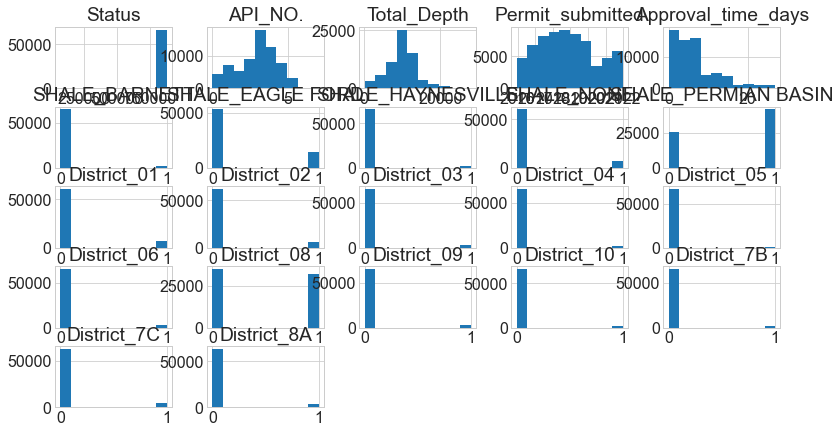

In [17]:
permits.hist()

- well depth is normally distributed
- notice a dropoff in permits in 2020--covid related downturn, for sure
- some of the permits were submitted as early as 2012
- almost all approval times were a matter of a couple of days, with a couple of outliers
- not familiar with the meaning of the status or api number, would be good to investigate

<AxesSubplot:>

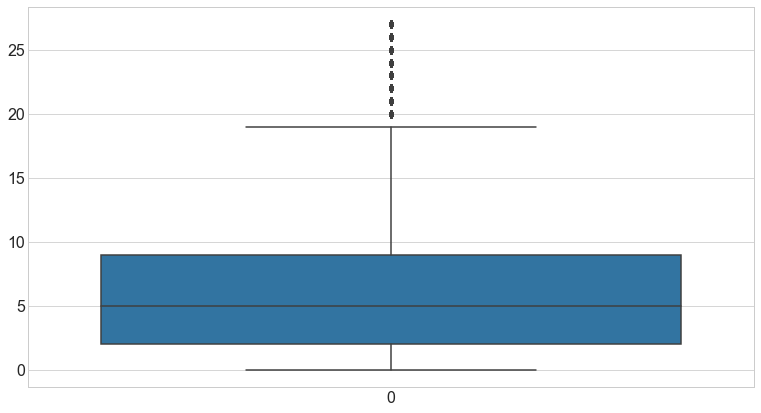

In [18]:
sns.boxplot(data=permits.Approval_time_days)

array([[<AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>,
        <AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>],
       [<AxesSubplot:title={'center':'SHALE_BARNETT'}>,
        <AxesSubplot:title={'center':'SHALE_EAGLE FORD'}>,
        <AxesSubplot:title={'center':'SHALE_HAYNESVILLE'}>,
        <AxesSubplot:title={'center':'SHALE_NONE'}>,
        <AxesSubplot:title={'center':'SHALE_PERMIAN BASIN'}>],
       [<AxesSubplot:title={'center':'District_01'}>,
        <AxesSubplot:title={'center':'District_02'}>,
        <AxesSubplot:title={'center':'District_03'}>,
        <AxesSubplot:title={'center':'District_04'}>,
        <AxesSubplot:title={'center':'District_05'}>],
       [<AxesSubplot:title={'center':'District_06'}>,
        <AxesSubplot:title={'center':'District_08'}>,
        <AxesSubplot:title={'center':'District_09'}>,
  

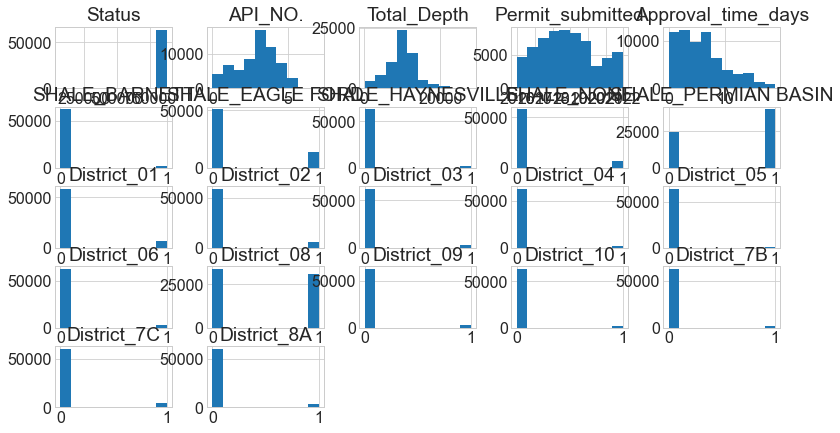

In [19]:
permits = wrangle_module.remove_outliers(permits, 1.5, ['Approval_time_days'])
permits.hist()

- the remove outliers feature, which i will implement in the wrangle_module, takes care of those extreme approval times, and hence the early permit submissions

In [20]:
permits.columns

Index(['Status_Date', 'Status', 'API_NO.', 'Operator_Name_Number',
       'Lease_Name', 'Well', 'District', 'County', 'Wellbore_Profile',
       'Filing_Purpose', 'Amend', 'Total_Depth', 'Current_Queue',
       'Permit_submitted', 'Approval_time_days', 'SHALE', 'Depth_bin',
       'SHALE_BARNETT', 'SHALE_EAGLE FORD', 'SHALE_HAYNESVILLE', 'SHALE_NONE',
       'SHALE_PERMIAN BASIN', 'District_01', 'District_02', 'District_03',
       'District_04', 'District_05', 'District_06', 'District_08',
       'District_09', 'District_10', 'District_7B', 'District_7C',
       'District_8A'],
      dtype='object')

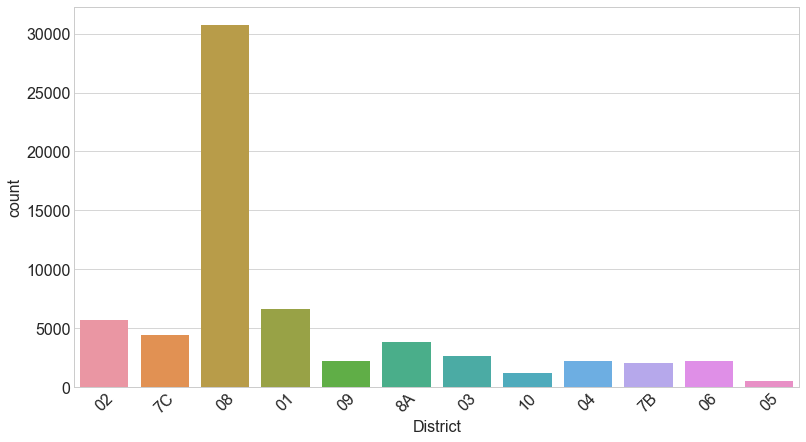

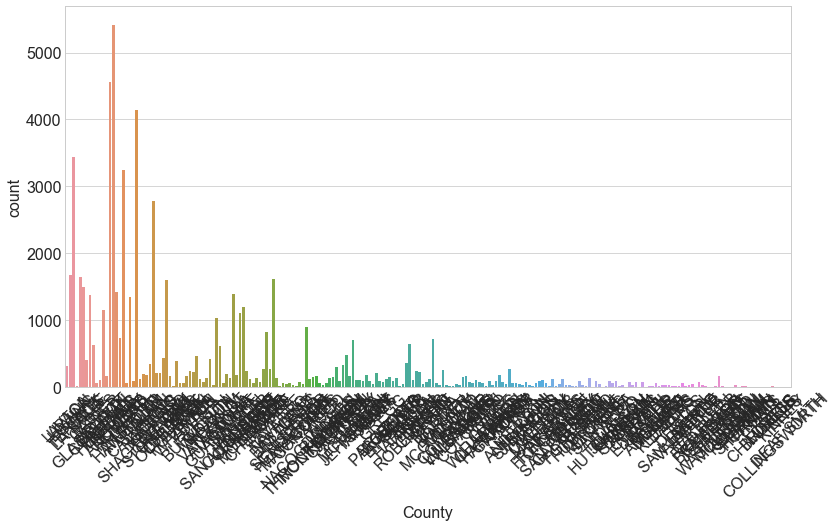

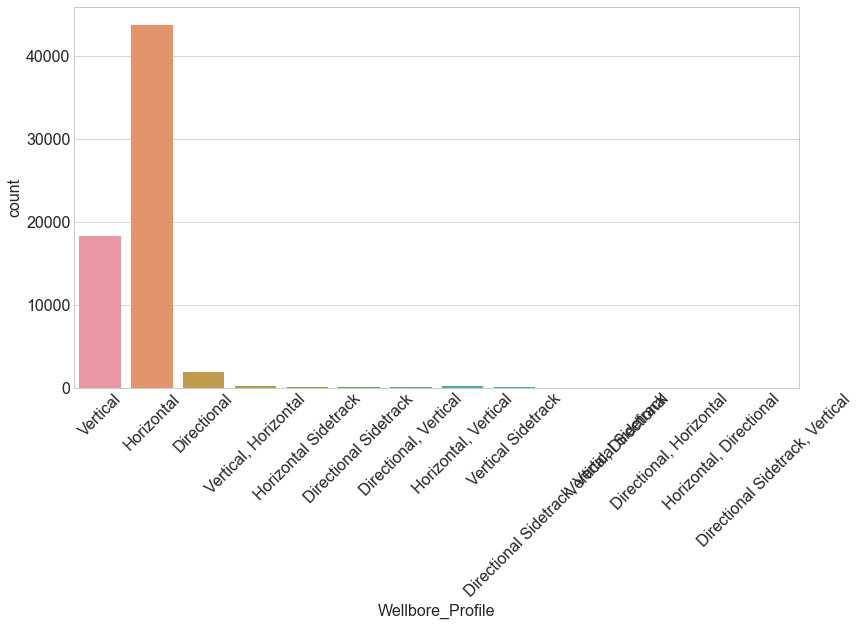

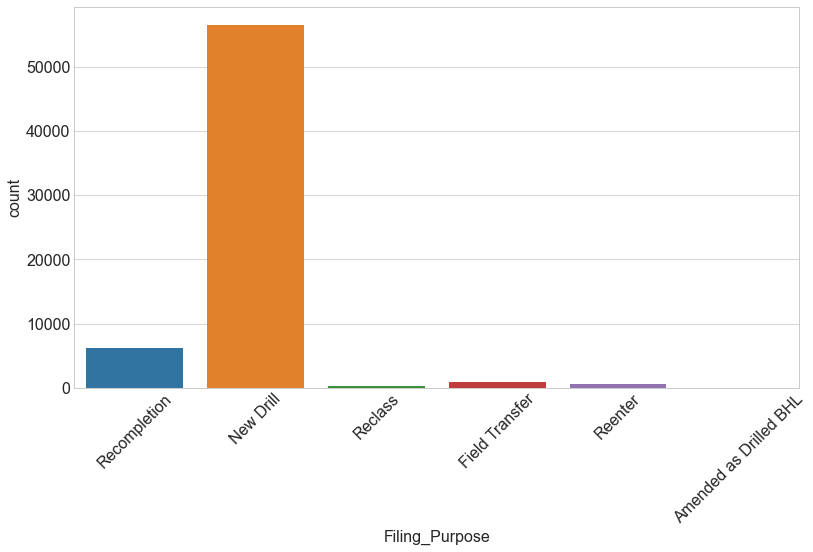

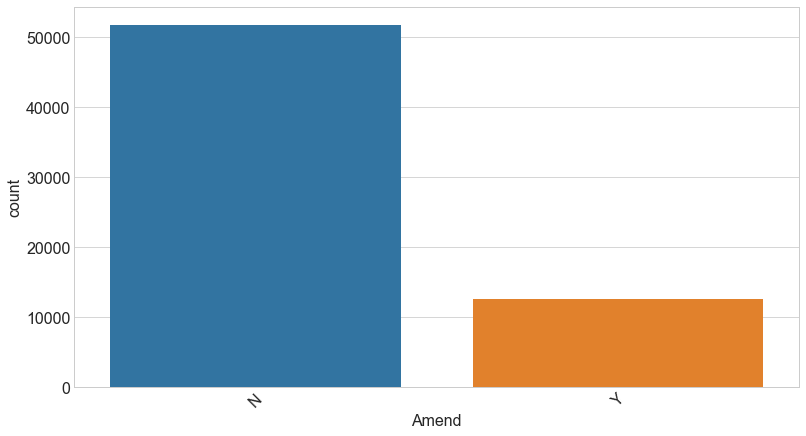

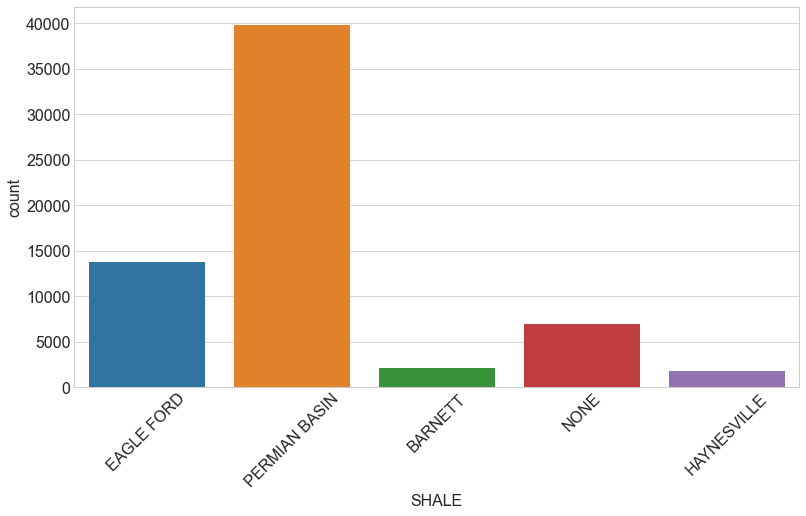

In [21]:
disc_vars = ['District', 'County','Wellbore_Profile', 'Filing_Purpose', 'Amend','SHALE']
for var in disc_vars:
    plt.figure()
    sns.countplot(x=var,data=permits)
    plt.xticks(rotation = 45)

- District 8 is far and away the biggest for drilling permits
- There are six counties with considerably higher permitting--explore this more
- Horizontal wells are surprisingly the most common for permitting, followed by vertical.  Presumably due to the prevalence of fracking
- Almost everything is new drilling--consider dropping the rest of the filing purposes
- Relatively few ammended permits, but enough to take into account. Explo further?
- The Permian is far and away the highest area for permitting, followed by the eagleford shale.  

<AxesSubplot:xlabel='Permit_approved', ylabel='Approval_time_days'>

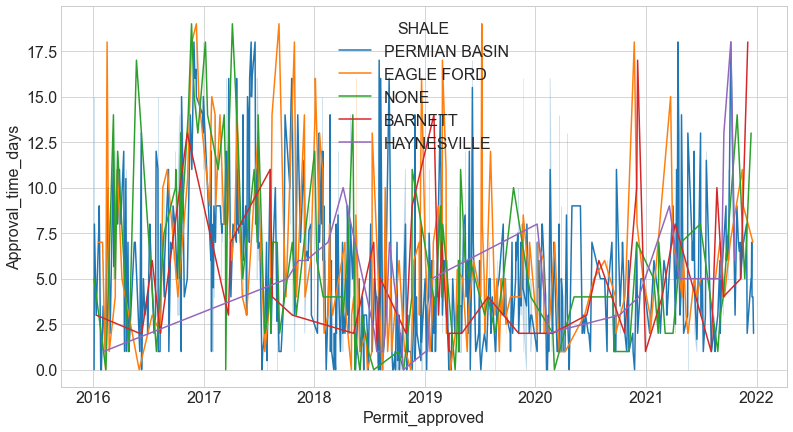

In [22]:
temp = permits.sample(1000)
sns.lineplot(data=temp,x=temp.index, y= 'Approval_time_days', hue = 'SHALE')

- Nothing too helpful in this graph

In [23]:
permits.County.value_counts().tail(50)

UPSHUR           19
BEXAR            19
JOHNSON          19
COMANCHE         17
HALE             17
JEFF DAVIS       17
LUBBOCK          17
TRINITY          16
FOARD            16
MOTLEY           16
BAYLOR           15
OLDHAM           14
NAVARRO          14
SHERMAN          12
TITUS            11
MORRIS           11
TERRELL          11
SAN JACINTO      11
MENARD           10
WILLACY          10
LYNN             10
FALLS            10
WILLIAMSON        9
ARANSAS           9
RED RIVER         8
GRAY              7
ERATH             6
PRESIDIO          6
FRANKLIN          5
MCLENNAN          5
KAUFMAN           4
CAMERON           4
HALL              3
HILL              3
CHILDRESS         3
SAN SABA          3
ELLIS             2
HUNT              2
HOPKINS           2
TRAVIS            2
SABINE            1
COLLINGSWORTH     1
CORYELL           1
FANNIN            1
DEAF SMITH        1
BRISCOE           1
MILLS             1
KINNEY            1
BELL              1
BREWSTER          1


### The top counties by permit requests:
- REEVES      5627
- MIDLAND     4883
- MARTIN      4361
- LOVING      3539
- HOWARD      3364
- KARNES      2903

<AxesSubplot:>

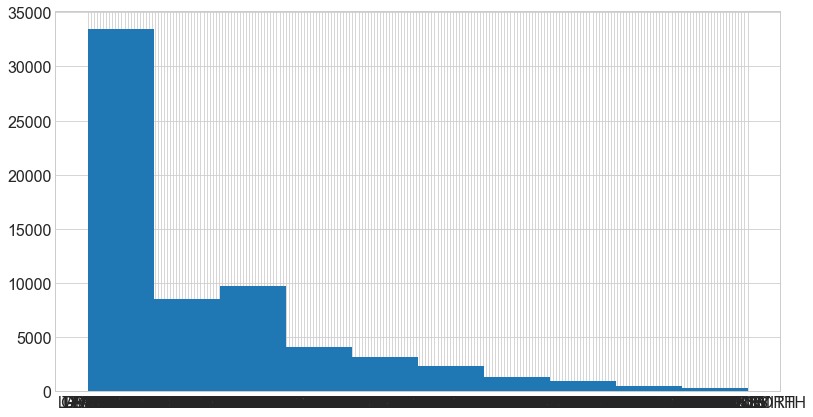

In [24]:
permits.County.hist()

<AxesSubplot:xlabel='Permit_approved'>

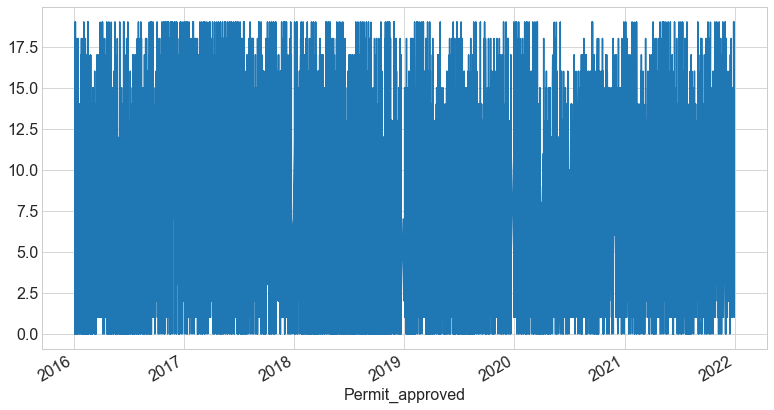

In [25]:
y = permits.Approval_time_days
y.plot()

## Splitting , Encoding and Scaling the data here for further explo
- for the time being, i will not pursue the time series analysis perspective and will do a typical split, pending further exploration

In [ ]:
permits = wrangle_module.encode_permits(permits)

In [26]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
wrangle_module.split_permits(permits)


In [27]:
train_scaled, X_train_scaled, y_train_scaled, validate_scaled, X_validate_scaled, y_validate_scaled, test_scaled, X_test_scaled, y_test_scaled = wrangle_module.scale_permits(train,validate,test)



/Users/brianclements/codeup-data-science/Individual_Project/wrangle_module.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Depth_scaled'] = scaler.transform(test[['Total_Depth']])


In [28]:
train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, \
X_validate.shape, y_validate.shape, X_test.shape, y_test.shape, train_scaled.shape, \
X_train_scaled.shape, y_train_scaled.shape, validate_scaled.shape, \
X_validate_scaled.shape, y_validate_scaled.shape, test_scaled.shape, \
X_test_scaled.shape, y_test_scaled.shape

((36092, 35),
 (15468, 35),
 (12891, 35),
 (36092, 33),
 (36092, 1),
 (15468, 33),
 (15468, 1),
 (12891, 33),
 (12891, 1),
 (36092, 34),
 (36092, 33),
 (36092, 1),
 (15468, 34),
 (15468, 33),
 (15468, 1),
 (12891, 34),
 (12891, 33),
 (12891, 1))

In [29]:
X_train_scaled.shape

(36092, 33)

In [30]:
train.head().T

Permit_approved,2018-07-02,2020-01-03,2019-03-04,2016-09-16,2017-04-13
Status_Date,Submitted 06/28/2018 Approved 07/02/2018,Submitted 12/30/2019 Approved 01/03/2020,Submitted 02/27/2019 Approved 03/04/2019,Submitted 09/14/2016 Approved 09/16/2016,Submitted 04/05/2017 Approved 04/13/2017
Status,841065,860445,850464,818477,825187
API_NO.,28336370,28534138,22734906,23740447,47943704
Operator_Name_Number,"EP ENERGY E&P COMPANY, L.P. (253385)","PENN VIRGINIA OIL & GAS, L.P. (651780)",LEGACY RESERVES OPERATING LP (495445),"COVENANT OPERATING, LLC (182800)","ESCONDIDO RESOURCES OPER CO, LLC (254231)"
Lease_Name,MUMME RANCH ALLOCATION A,MOOSE HUNTER,WATKINS 46,SAMES,REESE
Well,101H,5H,1,6,2H
District,01,02,08,09,04
County,LA SALLE,LAVACA,HOWARD,JACK,WEBB
Wellbore_Profile,Horizontal,Horizontal,Vertical,Vertical,Horizontal
Filing_Purpose,New Drill,New Drill,Field Transfer,New Drill,New Drill


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36092 entries, 2018-07-02 to 2021-07-21
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Status_Date           36092 non-null  object        
 1   Status                36092 non-null  int64         
 2   API_NO.               36092 non-null  int64         
 3   Operator_Name_Number  36092 non-null  object        
 4   Lease_Name            36092 non-null  object        
 5   Well                  36092 non-null  object        
 6   District              36092 non-null  object        
 7   County                36092 non-null  object        
 8   Wellbore_Profile      36092 non-null  object        
 9   Filing_Purpose        36092 non-null  object        
 10  Amend                 36092 non-null  object        
 11  Total_Depth           36092 non-null  int64         
 12  Current_Queue         36092 non-null  object        
 13 

### List some variables you want to plot against Approval_time_days
- SHALE
- Total_Depth
- Amend
- Filing_purpose
- Wellbore_Profile
- County
- District

### These are all categorical with the exception of Total_Depth



In [32]:
train[train.District == '05'].Approval_time_days.mean()

6.764912280701754

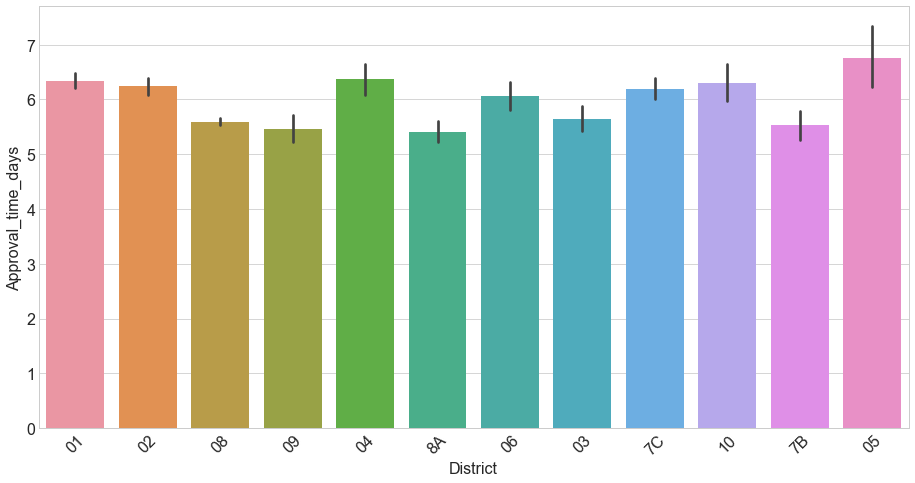

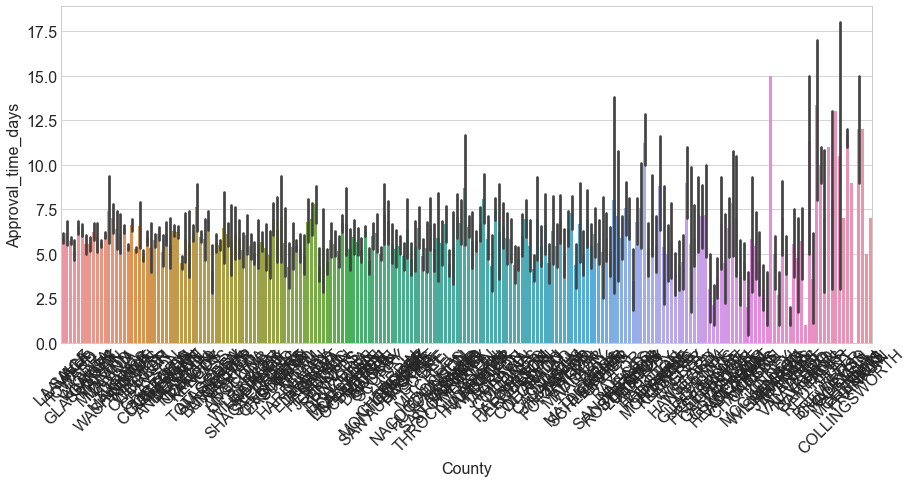

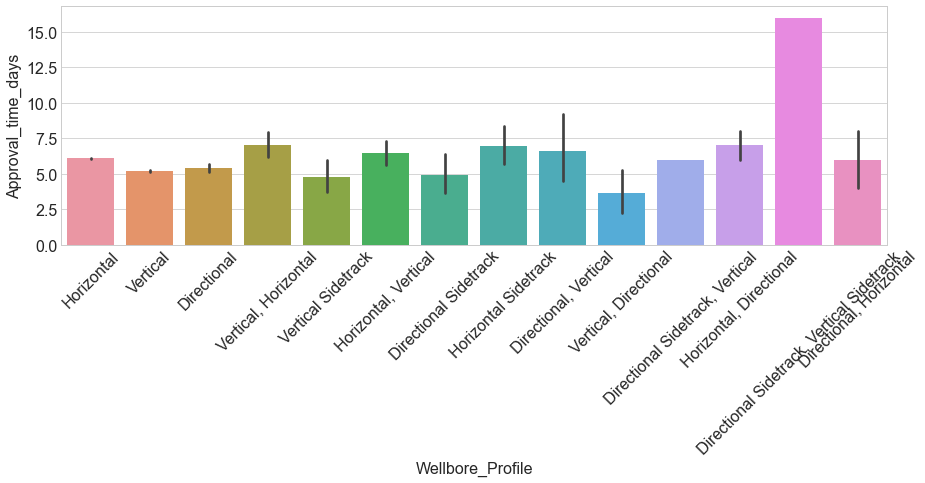

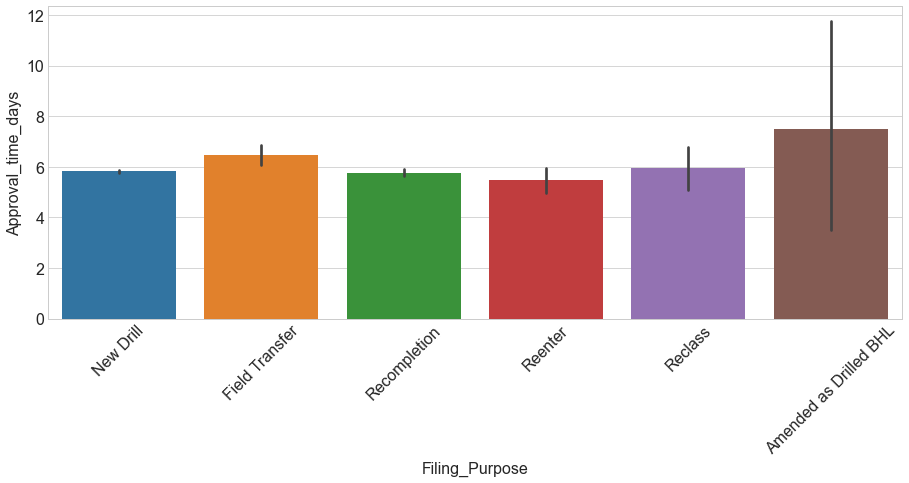

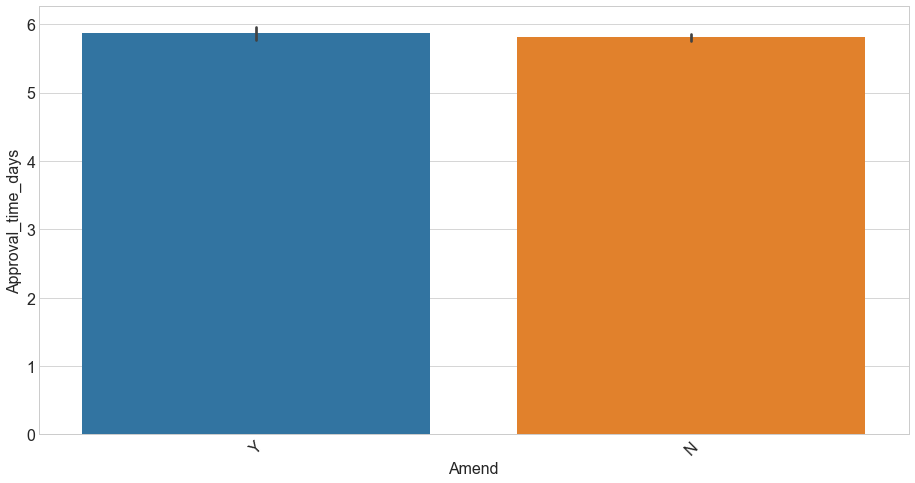

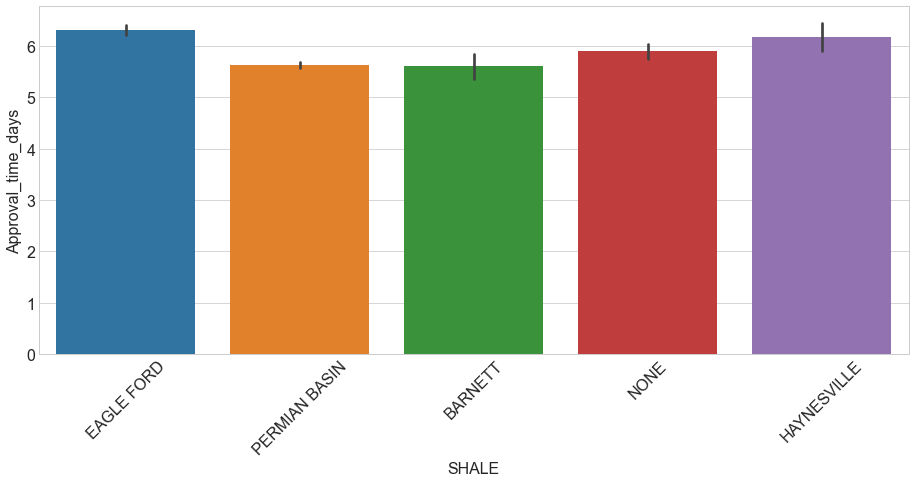

In [33]:
for var in disc_vars:
    plt.figure()
    sns.barplot(y= train.Approval_time_days, x=var,data=train)
    plt.xticks(rotation = 45)
    plt.tight_layout()

- District 5 has a slightly higher approval time, but this would need to be shown with some statistical testing
- There are a few particularly slow counties for permitting, it would be interesting to isolate and explore these
- filing purpose has virtually no relation to approval time, amend as well
- all shales have almost identical approval times; haynesville is a tiny bit more, but stats testing would be required to show this for sure
- directional horizontal wells have a slightly shorter approval time. However, there are only three wellbore profiles with significant numbers: horizontal, vertical, and directional.  To the extent the rest might need to be dropped

In [34]:
train[train.Wellbore_Profile == 'Directional, Horizontal']

,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,...,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A,Depth_scaled
Permit_approved,,,,,,,,,,,,,,,,,,,,,
2021-10-01,Submitted 09/23/2021 Approved 10/01/2021,873079,47944495,"HEADINGTON ENERGY PARTNERS, LLC (370061)",MILAGROS,1H,04,WEBB,"Directional, Horizontal",New Drill,...,1,0,0,0,0,0,0,0,0,0.460460
2018-10-29,Submitted 10/25/2018 Approved 10/29/2018,846194,25536206,ENCANA OIL & GAS(USA) INC. (251691),BURRIS UNIT,2H,02,KARNES,"Directional, Horizontal",New Drill,...,0,0,0,0,0,0,0,0,0,0.388569


In [35]:
permits.Wellbore_Profile.value_counts()

Horizontal                                   43667
Vertical                                     18223
Directional                                   1930
Vertical, Horizontal                           170
Horizontal, Vertical                           153
Vertical Sidetrack                              85
Directional Sidetrack                           83
Horizontal Sidetrack                            82
Directional, Vertical                           28
Vertical, Directional                           21
Horizontal, Directional                          3
Directional, Horizontal                          3
Directional Sidetrack, Vertical Sidetrack        2
Directional Sidetrack, Vertical                  1
Name: Wellbore_Profile, dtype: int64

- There are only 3 wellbore profiles of much any significance: horizontal, vertical, and directional

## Which counties are fastest/slowest for approvals?

In [36]:
train[train.Approval_time_days > 15].County.value_counts()#.head(10)

MIDLAND    109
KARNES      71
REEVES      68
MARTIN      57
HOWARD      54
          ... 
TITUS        1
ZAPATA       1
DENTON       1
BROWN        1
KAUFMAN      1
Name: County, Length: 132, dtype: int64

In [37]:
train.groupby(by='County').Approval_time_days.mean().sort_values().tail(11)

County
HALL         10.000000
KAUFMAN      10.500000
BREWSTER     11.000000
TITUS        11.250000
CAMERON      11.333333
MCLENNAN     11.666667
FRANKLIN     12.000000
TRAVIS       12.000000
HUNT         13.000000
RED RIVER    13.333333
KINNEY       15.000000
Name: Approval_time_days, dtype: float64

- The above is the list of counties with mean approval times over ten days

In [38]:
train.groupby(by='County').Approval_time_days.mean().sort_values().head(11)

County
PRESIDIO      0.000000
HILL          1.000000
ARANSAS       1.333333
HALE          2.000000
SHERMAN       2.125000
WILLIAMSON    2.500000
MENARD        2.666667
LYNN          3.000000
COKE          3.000000
LUBBOCK       3.500000
FOARD         3.571429
Name: Approval_time_days, dtype: float64

- And the counties with a mean approval time less than 4 days

In [39]:
quick_counties = \
['HILL',
'WILLIAMSON',
'SHERMAN',
'HALE', 
'KAUFMAN',
'CHILDRESS',
'WALLER',
'LAMB',  
'MENARD',
'WILLACY',
'FOARD']

In [40]:
for county in quick_counties:
    print(len(train[train.County == county]))

1
4
8
7
2
2
24
15
3
7
7


- There are exceedingly few permit approvals for these counties on the bottom end of the approval times

In [41]:
slow_counties = ['DALLAS', 'FALLS', 'BREWSTER', 'SAN JACINTO', 'MCLENNAN', 'RED RIVER',
       'HUNT', 'TITUS', 'SABINE', 'FLOYD', 'HOPKINS']

In [42]:
for county in slow_counties:
    print(len(train[train.County == county]))

11
6
1
5
3
3
1
8
0
0
0


- likewise, there are few observations in the slow counties

In [43]:
len(train[train.County == 'REEVES'])

3014

In [44]:
train[train.County == 'REEVES'].Approval_time_days.mean()

5.254147312541473

- The fastest and slowest counties have very few permits being approved every year, on average; as a counter-example, refer to Reeves county, with its 3014 permits over the period studied (and 5.25 day average approval time)
- The county is going to be an issue to use for modeling due to dimensionaliy issues

In [45]:
# train.County.value_counts().tail(30)

## Do deeper wells experience longer approval times?

<AxesSubplot:xlabel='Approval_time_days', ylabel='Total_Depth'>

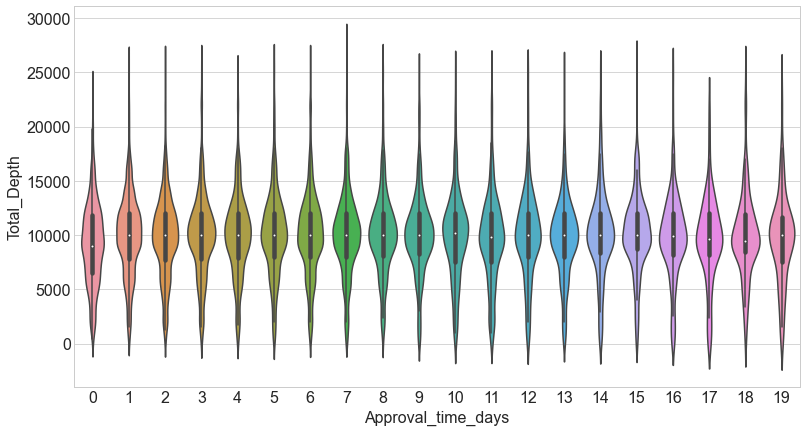

In [46]:
sns.violinplot(data=train, y = 'Total_Depth', x = 'Approval_time_days')

- not a clear conclusion, this would be ripe for a levene then ANOVA test for differing variance

### Running a levene test to check on the variances between the populations above:

- H_0: The variances of the approval times by total depth are the same in all populations
- H_A: The variance in the populations is different

In [47]:
stats.levene(
train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth,
# train[train.Approval_time_days==20].Total_Depth,
# train[train.Approval_time_days==21].Total_Depth,
# train[train.Approval_time_days==22].Total_Depth,
# train[train.Approval_time_days==23].Total_Depth,
# train[train.Approval_time_days==24].Total_Depth,
# train[train.Approval_time_days==25].Total_Depth,
# train[train.Approval_time_days==26].Total_Depth,
# train[train.Approval_time_days==27].Total_Depth,
)

LeveneResult(statistic=2.3285872469811677, pvalue=0.000878537129762106)

- the variances are not equal

### Kruskal-Wallace testing (since the variances are unequal):

- H_O: The population means for the different well depths (by approval time) is the same
- H_a: These population means are different

In [48]:
alpha = .05

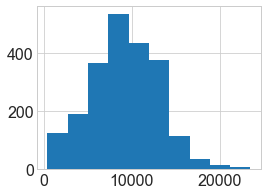

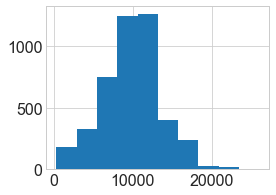

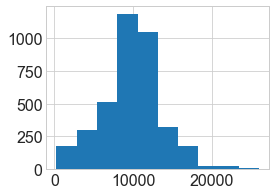

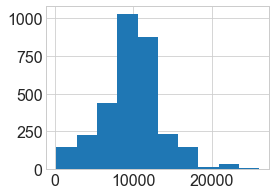

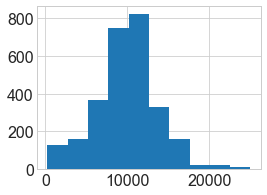

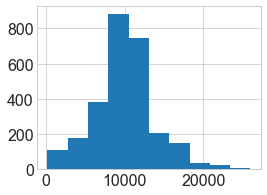

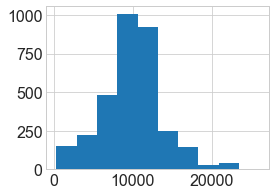

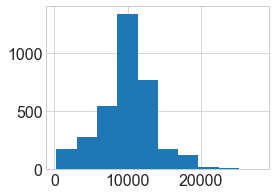

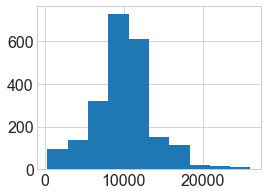

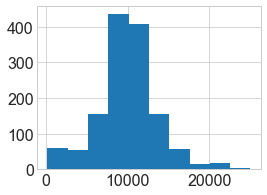

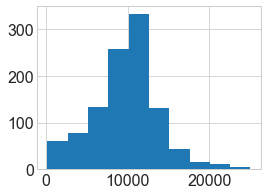

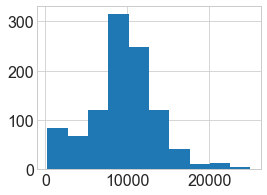

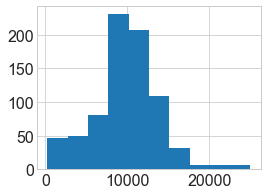

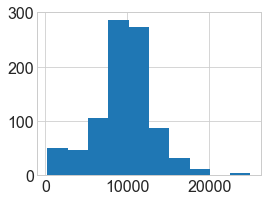

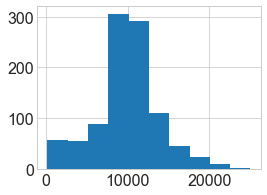

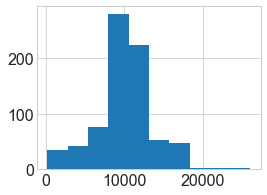

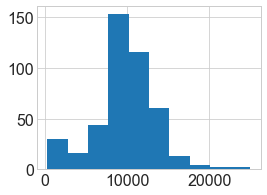

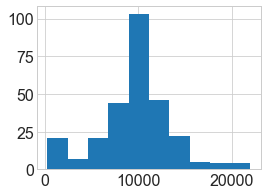

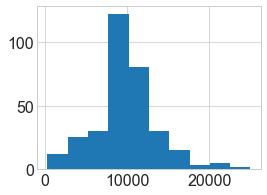

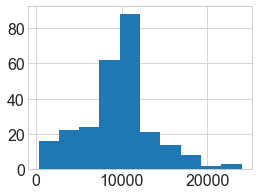

In [49]:
for i in [train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth]:
# train[train.Approval_time_days==20].Total_Depth,
# train[train.Approval_time_days==21].Total_Depth,
# train[train.Approval_time_days==22].Total_Depth,
# train[train.Approval_time_days==23].Total_Depth,
# train[train.Approval_time_days==24].Total_Depth,
# train[train.Approval_time_days==25].Total_Depth,
# train[train.Approval_time_days==26].Total_Depth,
# train[train.Approval_time_days==27].Total_Depth]:
    plt.figure(figsize=(4,3))
    i.hist()
    plt.show()

- These are generally normally distributed

In [50]:
f, p = stats.kruskal(
train[train.Approval_time_days==0].Total_Depth,
train[train.Approval_time_days==1].Total_Depth,
train[train.Approval_time_days==2].Total_Depth,
train[train.Approval_time_days==3].Total_Depth,
train[train.Approval_time_days==4].Total_Depth,
train[train.Approval_time_days==5].Total_Depth,
train[train.Approval_time_days==6].Total_Depth,
train[train.Approval_time_days==7].Total_Depth,
train[train.Approval_time_days==8].Total_Depth,
train[train.Approval_time_days==9].Total_Depth,
train[train.Approval_time_days==10].Total_Depth,
train[train.Approval_time_days==11].Total_Depth,
train[train.Approval_time_days==12].Total_Depth,
train[train.Approval_time_days==13].Total_Depth,
train[train.Approval_time_days==14].Total_Depth,
train[train.Approval_time_days==15].Total_Depth,
train[train.Approval_time_days==16].Total_Depth,
train[train.Approval_time_days==17].Total_Depth,
train[train.Approval_time_days==18].Total_Depth,
train[train.Approval_time_days==19].Total_Depth)
# train[train.Approval_time_days==20].Total_Depth,
# train[train.Approval_time_days==21].Total_Depth,
# train[train.Approval_time_days==22].Total_Depth,
# train[train.Approval_time_days==23].Total_Depth,
# train[train.Approval_time_days==24].Total_Depth,
# train[train.Approval_time_days==25].Total_Depth,
# train[train.Approval_time_days==26].Total_Depth,
# train[train.Approval_time_days==27].Total_Depth)

f, p

(111.44654137980565, 4.3121489044055656e-15)

In [51]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


- I can proceed with the understanding that there is a difference in the means of Total_depth by approval time, although a linear correlation is not evident at this time

## Does the shale formation impact approval time?

In [52]:
train.SHALE.value_counts()

PERMIAN BASIN    22297
EAGLE FORD        7701
NONE              3881
BARNETT           1238
HAYNESVILLE        975
Name: SHALE, dtype: int64

In [53]:
train.SHALE.value_counts().index

Index(['PERMIAN BASIN', 'EAGLE FORD', 'NONE', 'BARNETT', 'HAYNESVILLE'], dtype='object')

In [54]:
shales = ['PERMIAN BASIN', 'EAGLE FORD', 'NONE', 'BARNETT', 'HAYNESVILLE']
for shale in shales:
    print(train[train.SHALE == shale].Approval_time_days.mean())

5.639009732250975
6.303077522399688
5.8953877866529245
5.6025848142164785
6.17948717948718


- The Barnett is fastest for approval; the Haynesville is slowest.  Stats testing here (and there is significant concern about noise in the data/limited differences between the means of the groups):

### Running a levene test to check on the variances between the populations above:

- H_0: The variances of the approval times by SHALE are the same in all populations
- H_A: The variance in the populations is different

In [55]:
stats.levene(
train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days,
train[train.SHALE == 'EAGLE FORD'].Approval_time_days,
train[train.SHALE == 'NONE'].Approval_time_days,
train[train.SHALE == 'BARNETT'].Approval_time_days,
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days
)

LeveneResult(statistic=2.077296819448907, pvalue=0.08091041864008056)

- The null hypothesis cannot be rejected; the variances may be equal

In [56]:
train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days.var(),

(19.728264681331826,)

In [57]:
train[train.SHALE == 'EAGLE FORD'].Approval_time_days.var(),

(20.375404813340324,)

In [58]:
train[train.SHALE == 'NONE'].Approval_time_days.var(),

(20.843692639531458,)

In [59]:
train[train.SHALE == 'BARNETT'].Approval_time_days.var(),

(19.27119784041578,)

In [60]:
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days.var()

20.038593165903272

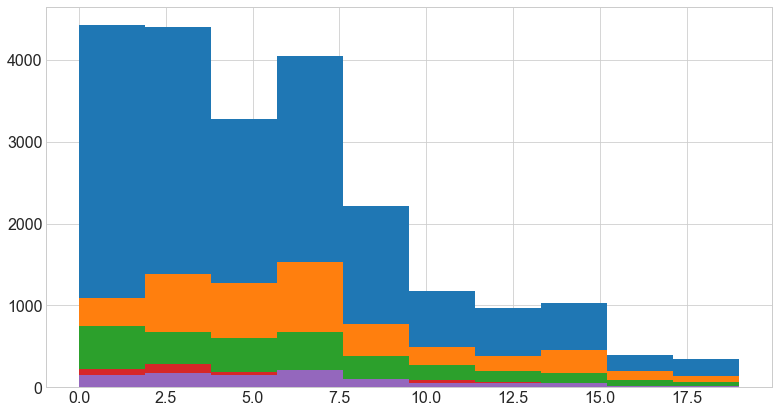

In [61]:
for i in [train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days,
train[train.SHALE == 'EAGLE FORD'].Approval_time_days,
train[train.SHALE == 'NONE'].Approval_time_days,
train[train.SHALE == 'BARNETT'].Approval_time_days,
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days]:
    i.hist()

- also, not normally distributed

### ANOVA testing to follow (the target variable is continuous here):

- H_O: Shale is independent of the number of days to approval
- H_a: Shale plays a role in the length of time to approval

In [62]:
f, p =stats.f_oneway(train[train.SHALE == 'PERMIAN BASIN'].Approval_time_days,
train[train.SHALE == 'EAGLE FORD'].Approval_time_days,
train[train.SHALE == 'NONE'].Approval_time_days,
train[train.SHALE == 'BARNETT'].Approval_time_days,
train[train.SHALE == 'HAYNESVILLE'].Approval_time_days)

f,p

(34.21107994241078, 1.5160408595986757e-28)

- the tiny p value returned shows the null hypothesis can be rejected; proceeding with the understanding that the shale does in fact play some small role in the approval time

### Unfortunately, the chi ^ 2 approach taken below was mistaken...

In [63]:
n = train.shape[0]

In [64]:
shale_proportion = train.SHALE.value_counts() / n

In [65]:
shale_proportion

PERMIAN BASIN    0.617782
EAGLE FORD       0.213371
NONE             0.107531
BARNETT          0.034301
HAYNESVILLE      0.027014
Name: SHALE, dtype: float64

In [66]:
approval_time_proportion = train.Approval_time_days.value_counts() / n
approval_time_proportion

1     0.122908
2     0.104289
7     0.094730
6     0.090131
3     0.087277
4     0.076831
5     0.075391
0     0.060983
8     0.060817
9     0.037820
10    0.029508
11    0.028372
14    0.027485
13    0.024825
12    0.021417
15    0.021168
16    0.012191
18    0.008977
17    0.007675
19    0.007204
Name: Approval_time_days, dtype: float64

In [67]:
expected = pd.DataFrame()

for shale, s_prop in shale_proportion.iteritems():
    for approval_time, a_prop in approval_time_proportion.iteritems():
        expected.loc[approval_time, shale] = s_prop * a_prop

expected.sort_index(inplace=True)
expected

,PERMIAN BASIN,EAGLE FORD,NONE,BARNETT,HAYNESVILLE
0,0.037674,0.013012,0.006558,0.002092,0.001647
1,0.075930,0.026225,0.013216,0.004216,0.003320
2,0.064428,0.022252,0.011214,0.003577,0.002817
3,0.053918,0.018622,0.009385,0.002994,0.002358
4,0.047465,0.016394,0.008262,0.002635,0.002076
5,0.046575,0.016086,0.008107,0.002586,0.002037
6,0.055681,0.019231,0.009692,0.003092,0.002435
7,0.058523,0.020213,0.010186,0.003249,0.002559
8,0.037572,0.012977,0.006540,0.002086,0.001643
9,0.023365,0.008070,0.004067,0.001297,0.001022


In [68]:
expected *= n
expected

,PERMIAN BASIN,EAGLE FORD,NONE,BARNETT,HAYNESVILLE
0,1359.738917,469.630417,236.675191,75.497008,59.458467
1,2740.482434,946.515460,477.006428,152.160257,119.835421
2,2325.332705,803.129890,404.745761,129.109830,101.681813
3,1946.014352,672.119860,338.721877,108.048875,85.095035
4,1713.110412,591.678848,298.182783,95.117311,74.910645
5,1680.985731,580.583537,292.591184,93.333647,73.505902
6,2009.645933,694.097113,349.797545,111.581902,87.877507
7,2112.197800,729.516763,367.647650,117.275906,92.361881
8,1356.032223,468.350188,236.030007,75.291200,59.296381
9,843.272886,291.251939,146.779480,46.821179,36.874515


In [69]:
observed = pd.crosstab(train.SHALE, train.Approval_time_days).T
observed

SHALE,BARNETT,EAGLE FORD,HAYNESVILLE,NONE,PERMIAN BASIN
Approval_time_days,,,,,
0,94,325,39,287,1456
1,125,762,108,467,2974
2,143,703,85,371,2462
3,137,680,91,299,1943
4,108,655,74,316,1620
5,81,623,73,288,1656
6,114,715,120,341,1963
7,98,811,90,335,2085
8,59,475,68,218,1375


In [70]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

349.20819993372794

In [71]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [72]:
stats.chi2(degrees_of_freedom).sf(chi2)


1.2310354992874047e-36

- a miniscule p value; the null hypothesis can be rejected
### The chi^2 test demonstrates that the length of time to approval is related to the shale formation

In [73]:
train.head()

,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,...,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A,Depth_scaled
Permit_approved,,,,,,,,,,,,,,,,,,,,,
2018-07-02,Submitted 06/28/2018 Approved 07/02/2018,841065,28336370,"EP ENERGY E&P COMPANY, L.P. (253385)",MUMME RANCH ALLOCATION A,101H,01,LA SALLE,Horizontal,New Drill,...,0,0,0,0,0,0,0,0,0,0.352624
2020-01-03,Submitted 12/30/2019 Approved 01/03/2020,860445,28534138,"PENN VIRGINIA OIL & GAS, L.P. (651780)",MOOSE HUNTER,5H,02,LAVACA,Horizontal,New Drill,...,0,0,0,0,0,0,0,0,0,0.514378
2019-03-04,Submitted 02/27/2019 Approved 03/04/2019,850464,22734906,LEGACY RESERVES OPERATING LP (495445),WATKINS 46,1,08,HOWARD,Vertical,Field Transfer,...,0,0,0,1,0,0,0,0,0,0.304098
2016-09-16,Submitted 09/14/2016 Approved 09/16/2016,818477,23740447,"COVENANT OPERATING, LLC (182800)",SAMES,6,09,JACK,Vertical,New Drill,...,0,0,0,0,1,0,0,0,0,0.136952
2017-04-13,Submitted 04/05/2017 Approved 04/13/2017,825187,47943704,"ESCONDIDO RESOURCES OPER CO, LLC (254231)",REESE,2H,04,WEBB,Horizontal,New Drill,...,1,0,0,0,0,0,0,0,0,0.424515


In [74]:
train.corr()

,Status,API_NO.,Total_Depth,Approval_time_days,SHALE_BARNETT,SHALE_EAGLE FORD,SHALE_HAYNESVILLE,SHALE_NONE,SHALE_PERMIAN BASIN,District_01,...,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A,Depth_scaled
Status,1.000000,0.007803,0.030597,-0.187167,0.001400,-0.016998,0.032688,-0.038976,0.027749,-0.028668,...,-0.008509,-0.003925,0.028387,0.054297,-0.002451,-0.029685,-0.006589,-0.006056,-0.048971,0.030597
API_NO.,0.007803,1.000000,0.023189,-0.012046,-0.018623,-0.198764,0.033208,0.011947,0.155858,-0.194863,...,0.162367,0.040847,0.024971,0.048945,0.002243,0.023919,0.016155,0.182997,0.019550,0.023189
Total_Depth,0.030597,0.023189,1.000000,0.014858,-0.251668,0.243062,0.068801,-0.296870,0.055639,-0.013277,...,-0.017415,-0.027141,0.054419,0.206096,-0.269254,-0.095004,-0.263208,-0.069029,-0.185073,1.000000
Approval_time_days,-0.187167,-0.012046,0.014858,1.000000,-0.009219,0.055996,0.013316,0.005718,-0.051846,0.039533,...,0.022823,0.018793,0.010091,-0.048136,-0.015327,0.015180,-0.011647,0.022632,-0.023009,0.014858
SHALE_BARNETT,0.001400,-0.018623,-0.251668,-0.009219,1.000000,-0.098156,-0.031403,-0.065419,-0.239605,-0.063869,...,-0.035251,0.191301,-0.035281,-0.180059,0.650598,-0.026678,0.212362,-0.051016,-0.047761,-0.251668
SHALE_EAGLE FORD,-0.016998,-0.198764,0.243062,0.055996,-0.098156,1.000000,-0.086781,-0.180781,-0.662134,0.609530,...,0.176515,0.015426,-0.097497,-0.497580,-0.099584,-0.073724,-0.094654,-0.140979,-0.131984,0.243062
SHALE_HAYNESVILLE,0.032688,0.033208,0.068801,0.013316,-0.031403,-0.086781,1.000000,-0.057838,-0.211839,-0.056468,...,-0.031166,-0.014866,0.890090,-0.159193,-0.031860,-0.023587,-0.030283,-0.045104,-0.042226,0.068801
SHALE_NONE,-0.038976,0.011947,-0.296870,0.005718,-0.065419,-0.180781,-0.057838,1.000000,-0.441298,-0.082031,...,0.176587,0.052903,0.057164,-0.331627,0.147452,0.407808,0.191612,-0.093959,-0.087965,-0.296870
SHALE_PERMIAN BASIN,0.027749,0.155858,0.055639,-0.051846,-0.239605,-0.662134,-0.211839,-0.441298,1.000000,-0.418838,...,-0.237796,-0.113423,-0.237997,0.751480,-0.243091,-0.179965,-0.111788,0.212916,0.199332,0.055639
District_01,-0.028668,-0.194863,-0.013277,0.039533,-0.063869,0.609530,-0.056468,-0.082031,-0.418838,1.000000,...,-0.063387,-0.030234,-0.063440,-0.323770,-0.064798,-0.047971,-0.061590,-0.091733,-0.085881,-0.013277


- Basically no information to be gleaned here

In [75]:
train.head(1).T

Permit_approved,2018-07-02
Status_Date,Submitted 06/28/2018 Approved 07/02/2018
Status,841065
API_NO.,28336370
Operator_Name_Number,"EP ENERGY E&P COMPANY, L.P. (253385)"
Lease_Name,MUMME RANCH ALLOCATION A
Well,101H
District,01
County,LA SALLE
Wellbore_Profile,Horizontal
Filing_Purpose,New Drill


<AxesSubplot:xlabel='Depth_bin', ylabel='Approval_time_days'>

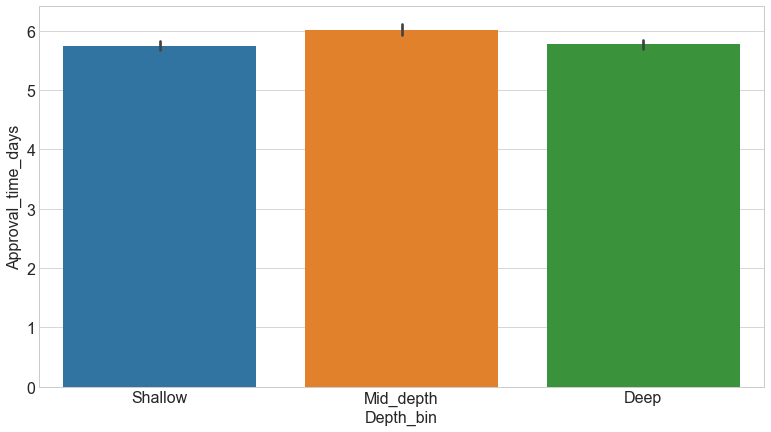

In [76]:
sns.barplot(data=train,x='Depth_bin',y= 'Approval_time_days')

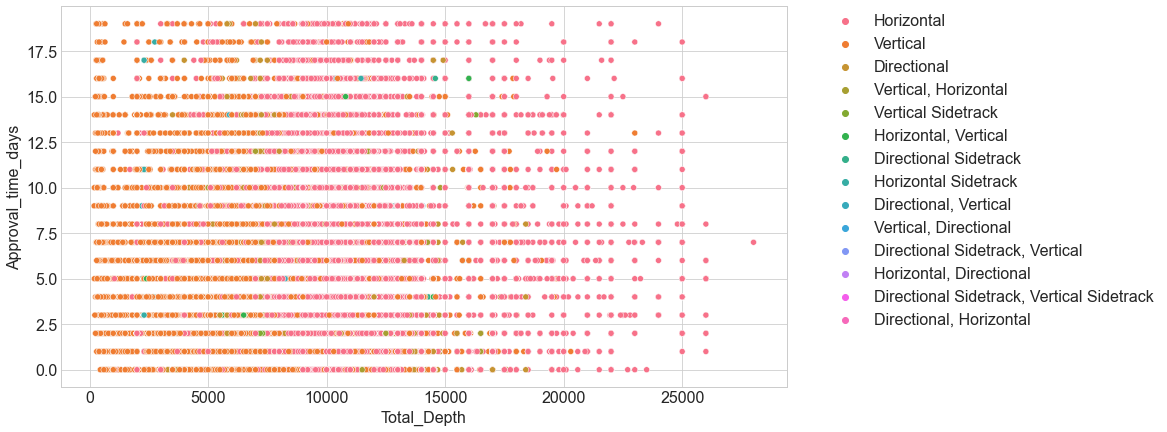

In [77]:
sns.scatterplot(data=train,x='Total_Depth',y='Approval_time_days',hue='Wellbore_Profile')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


- There aren't so many deep well; the approval time is pretty homogeneous across the visual

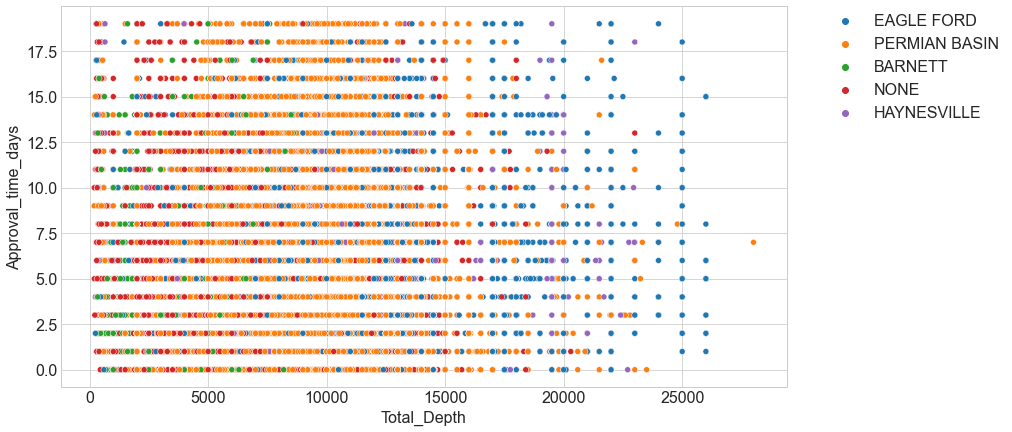

In [78]:
sns.scatterplot(data=train,x='Total_Depth',y='Approval_time_days',hue='SHALE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)



- Eagle Ford is represented more in the deeper end of the wells
- Fewer long approval times among the shallow wells
- The approval times, nevertheless, are pretty evenly distributed accross depths and shales

## Which district is the fastest for approval?

<AxesSubplot:xlabel='District', ylabel='Approval_time_days'>

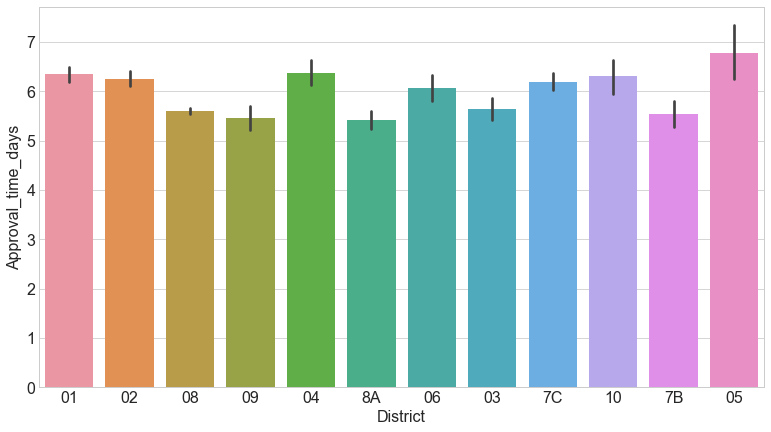

In [79]:
sns.barplot(data=train,x='District',y='Approval_time_days')

- Every district has a 5 or 6 day approval timee; districts 5 is just barely the fastest
- On the looks of it, there doesn't seem to be evidence supporting a strong relationship here.

# Modeling

(array([6637., 6914., 5494., 6672., 3560., 2089., 1669., 1756.,  717.,
         584.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

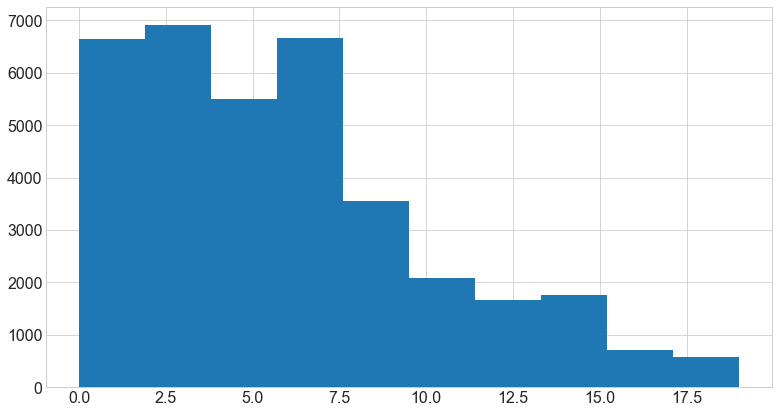

In [80]:
plt.hist(y_train)

- In spite of a few higher approval times, the fast majority are from 0 to 7 days

### Baseline

We will use MEAN as the baseline for the MVP 

### Features

Feature engineering will not be part of my modeling due to a lack of continuous features (there is only one; the rest are categorical and are encoded)

### All the X_train/validate/test_kbest/rfe are scaled from X_train/validate/test

In [81]:
y_train_scaled.Approval_time_days.mean()

5.8216225202260885

- The above is the average approval time, i.e. the baseline for modeling

In [82]:
X_train_scaled.head()

,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,...,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A,Depth_scaled
Permit_approved,,,,,,,,,,,,,,,,,,,,,
2018-07-02,Submitted 06/28/2018 Approved 07/02/2018,841065,28336370,"EP ENERGY E&P COMPANY, L.P. (253385)",MUMME RANCH ALLOCATION A,101H,01,LA SALLE,Horizontal,New Drill,...,0,0,0,0,0,0,0,0,0,0.352624
2020-01-03,Submitted 12/30/2019 Approved 01/03/2020,860445,28534138,"PENN VIRGINIA OIL & GAS, L.P. (651780)",MOOSE HUNTER,5H,02,LAVACA,Horizontal,New Drill,...,0,0,0,0,0,0,0,0,0,0.514378
2019-03-04,Submitted 02/27/2019 Approved 03/04/2019,850464,22734906,LEGACY RESERVES OPERATING LP (495445),WATKINS 46,1,08,HOWARD,Vertical,Field Transfer,...,0,0,0,1,0,0,0,0,0,0.304098
2016-09-16,Submitted 09/14/2016 Approved 09/16/2016,818477,23740447,"COVENANT OPERATING, LLC (182800)",SAMES,6,09,JACK,Vertical,New Drill,...,0,0,0,0,1,0,0,0,0,0.136952
2017-04-13,Submitted 04/05/2017 Approved 04/13/2017,825187,47943704,"ESCONDIDO RESOURCES OPER CO, LLC (254231)",REESE,2H,04,WEBB,Horizontal,New Drill,...,1,0,0,0,0,0,0,0,0,0.424515


In [83]:
X_train_scaled.columns

Index(['Status_Date', 'Status', 'API_NO.', 'Operator_Name_Number',
       'Lease_Name', 'Well', 'District', 'County', 'Wellbore_Profile',
       'Filing_Purpose', 'Amend', 'Current_Queue', 'Permit_submitted', 'SHALE',
       'Depth_bin', 'SHALE_BARNETT', 'SHALE_EAGLE FORD', 'SHALE_HAYNESVILLE',
       'SHALE_NONE', 'SHALE_PERMIAN BASIN', 'District_01', 'District_02',
       'District_03', 'District_04', 'District_05', 'District_06',
       'District_08', 'District_09', 'District_10', 'District_7B',
       'District_7C', 'District_8A', 'Depth_scaled'],
      dtype='object')

In [84]:
X_train_model = X_train_scaled.drop(columns = ['Status_Date', 'Status', 'API_NO.', 'Operator_Name_Number',
       'Lease_Name', 'Well', 'District', 'County', 'Wellbore_Profile',
       'Filing_Purpose', 'Amend', 'Current_Queue', 'Permit_submitted', 'SHALE',
       'Depth_bin'])

In [85]:
X_train_model.head()

,SHALE_BARNETT,SHALE_EAGLE FORD,SHALE_HAYNESVILLE,SHALE_NONE,SHALE_PERMIAN BASIN,District_01,District_02,District_03,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A,Depth_scaled
Permit_approved,,,,,,,,,,,,,,,,,,
2018-07-02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.352624
2020-01-03,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.514378
2019-03-04,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.304098
2016-09-16,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.136952
2017-04-13,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.424515


In [86]:
def create_data_for_models(X_train_scaled, X_validate_scaled, X_test_scaled):
    '''
    This function takes a DataFrame and manipulates it (by dropping features) to arrive at a set of features
    to put into different models.  All features are dropped except those categoricals that are encoded and the 
    single continuous feature in the data set.
    
    '''
    X_train_model = X_train_scaled.drop(columns = ['Status_Date', 'Status', 'API_NO.', 'Operator_Name_Number',
       'Lease_Name', 'Well', 'District', 'County', 'Wellbore_Profile',
       'Filing_Purpose', 'Amend', 'Current_Queue', 'Permit_submitted', 'SHALE',
       'Depth_bin'])
    X_validate_model = X_train_scaled.drop(columns = ['Status_Date', 'Status', 'API_NO.', 'Operator_Name_Number',
       'Lease_Name', 'Well', 'District', 'County', 'Wellbore_Profile',
       'Filing_Purpose', 'Amend', 'Current_Queue', 'Permit_submitted', 'SHALE',
       'Depth_bin'])
    X_test_model = X_train_scaled.drop(columns = ['Status_Date', 'Status', 'API_NO.', 'Operator_Name_Number',
       'Lease_Name', 'Well', 'District', 'County', 'Wellbore_Profile',
       'Filing_Purpose', 'Amend', 'Current_Queue', 'Permit_submitted', 'SHALE',
       'Depth_bin'])


    return X_train_model, X_validate_model, X_test_model

In [87]:
X_train_model, X_validate_model, X_test_model = create_data_for_models(X_train_scaled, X_validate_scaled, X_test_scaled)

In [88]:
X_validate_model.head()

,SHALE_BARNETT,SHALE_EAGLE FORD,SHALE_HAYNESVILLE,SHALE_NONE,SHALE_PERMIAN BASIN,District_01,District_02,District_03,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A,Depth_scaled
Permit_approved,,,,,,,,,,,,,,,,,,
2018-07-02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.352624
2020-01-03,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.514378
2019-03-04,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.304098
2016-09-16,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.136952
2017-04-13,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.424515


In [89]:
y_train_scaled.head(1)

,Approval_time_days
Permit_approved,
2018-07-02,4


In [90]:
# 1. Predict tax_value_pred_mean
# I create here new columns in the y_ data sets too hold the baseline value I am working with.
approval_time_pred_mean = y_train_scaled.Approval_time_days.mean()
y_train_scaled['Approval_time_pred_mean'] = round(approval_time_pred_mean, 2)
y_validate_scaled['Approval_time_pred_mean'] = round(approval_time_pred_mean,2)
y_test_scaled['Approval_time_pred_mean'] = round(approval_time_pred_mean,2)


In [91]:
y_train_scaled.head()

,Approval_time_days,Approval_time_pred_mean
Permit_approved,,
2018-07-02,4,5.82
2020-01-03,4,5.82
2019-03-04,5,5.82
2016-09-16,2,5.82
2017-04-13,8,5.82


In [92]:
# 2. RMSE of tax_value_pred_mean
# Here, I calculate the Root Mean Squared Error of the baseline and print it
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train_scaled.Approval_time_days,
                                y_train_scaled.Approval_time_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate_scaled.Approval_time_days, y_validate_scaled.Approval_time_pred_mean) ** (0.5)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  4.48 
Validate/Out-of-Sample:  4.48


In [93]:
# Here, I create a DataFrame to insert the evaluation metrics of the different models; this datafram will be 
# taken in by the modeling function below and expanded on.
metric_df = pd.DataFrame(data=[
            {
                'model': 'mean_baseline', 
                'RMSE_train': rmse_train,
                'RMSE_validate': rmse_validate
                }
            ])
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,4.477943,4.475568


In [94]:
y_train.head()

,Approval_time_days
Permit_approved,
2018-07-02,4
2020-01-03,4
2019-03-04,5
2016-09-16,2
2017-04-13,8


In [95]:
y_train_scaled.head()

,Approval_time_days,Approval_time_pred_mean
Permit_approved,,
2018-07-02,4,5.82
2020-01-03,4,5.82
2019-03-04,5,5.82
2016-09-16,2,5.82
2017-04-13,8,5.82


In [96]:
import model